<div align="center">
  <h1><strong>Technical Assignment #2</strong></h1>
  <table style="margin-bottom: 30px;">
    <tr>
      <th>Nama</th>
      <th>Kelompok</th>
      <th>Universitas</th>
    </tr>
    <tr>
      <td>Muhammad David Ubaidillah</td>
      <td>27</td>
      <td>Universitas Telkom</td>
    </tr>
  </table>
  
  ---------------
  
  <h1><strong>Dataset AI4I 2020 Predictive Machine Maintenance</strong></h1>
</div>
 The dataset consists of 10 000 data points stored as rows with 14 features in columns

1. UDI: unique identifier ranging from 1 to 10000
2. product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
3. air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
4. process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
5. rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
6. torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
7. tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
8. a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

#Load Library

In [1]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='ticks')
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

#Load Data

In [2]:
#load data google drive
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTTGYEXsV2xLLmDixchY79mAdK2ZAtb2RII6poayulYCEHwTbkASMWpLvRcoi1B5_CoZMwlcoqJOnHo/pub?gid=899451806&single=true&output=csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [3]:
#drop kolom yang tidak dibutuhkan
df = df.drop(columns=['UDI', 'Product ID','TWF', 'PWF', 'HDF','OSF','RNF'])
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


#Exploratory Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [5]:
#mendeteksi nilai yang kosong (null atau NaN) dalam DataFrame
df.isnull().sum()


Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

In [6]:
#mendeteksi nilai yang diplikat dalam DataFrame
df.duplicated().sum()


0

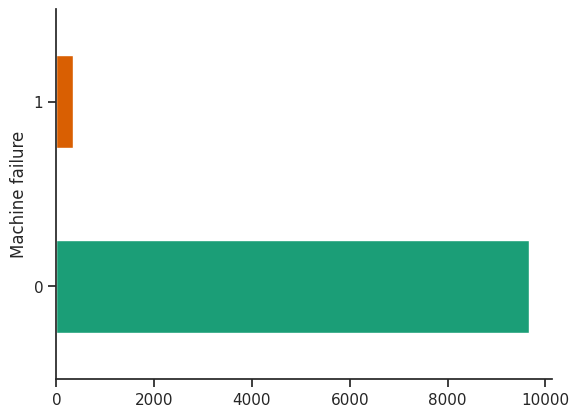

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Machine failure').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

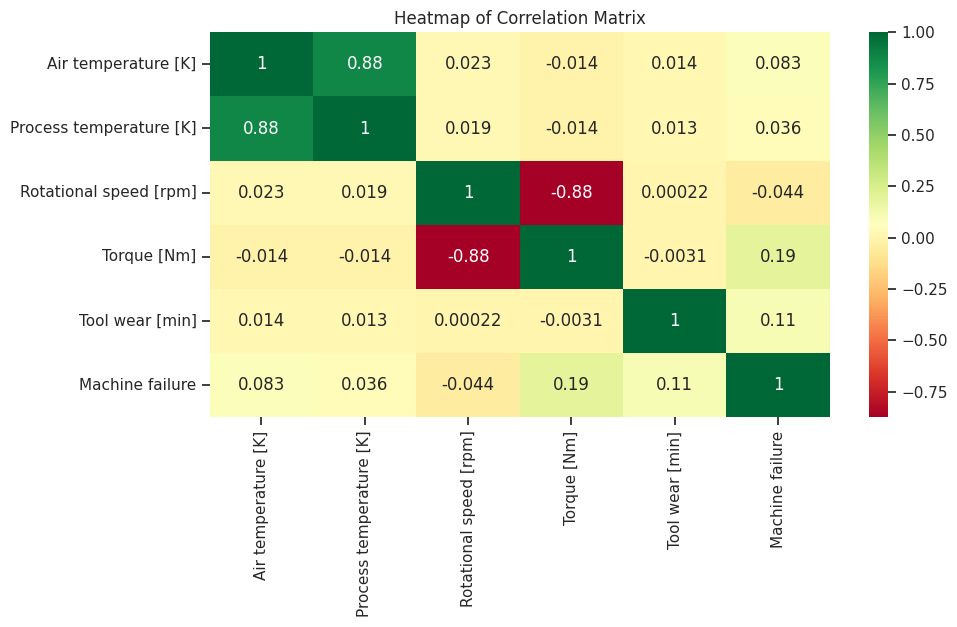

In [8]:
df_numerik = df.select_dtypes(include=['float64', 'int64'])
c = df_numerik.corr()

plt.figure(figsize=(10,5))
sns.heatmap(c, cmap="RdYlGn", annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

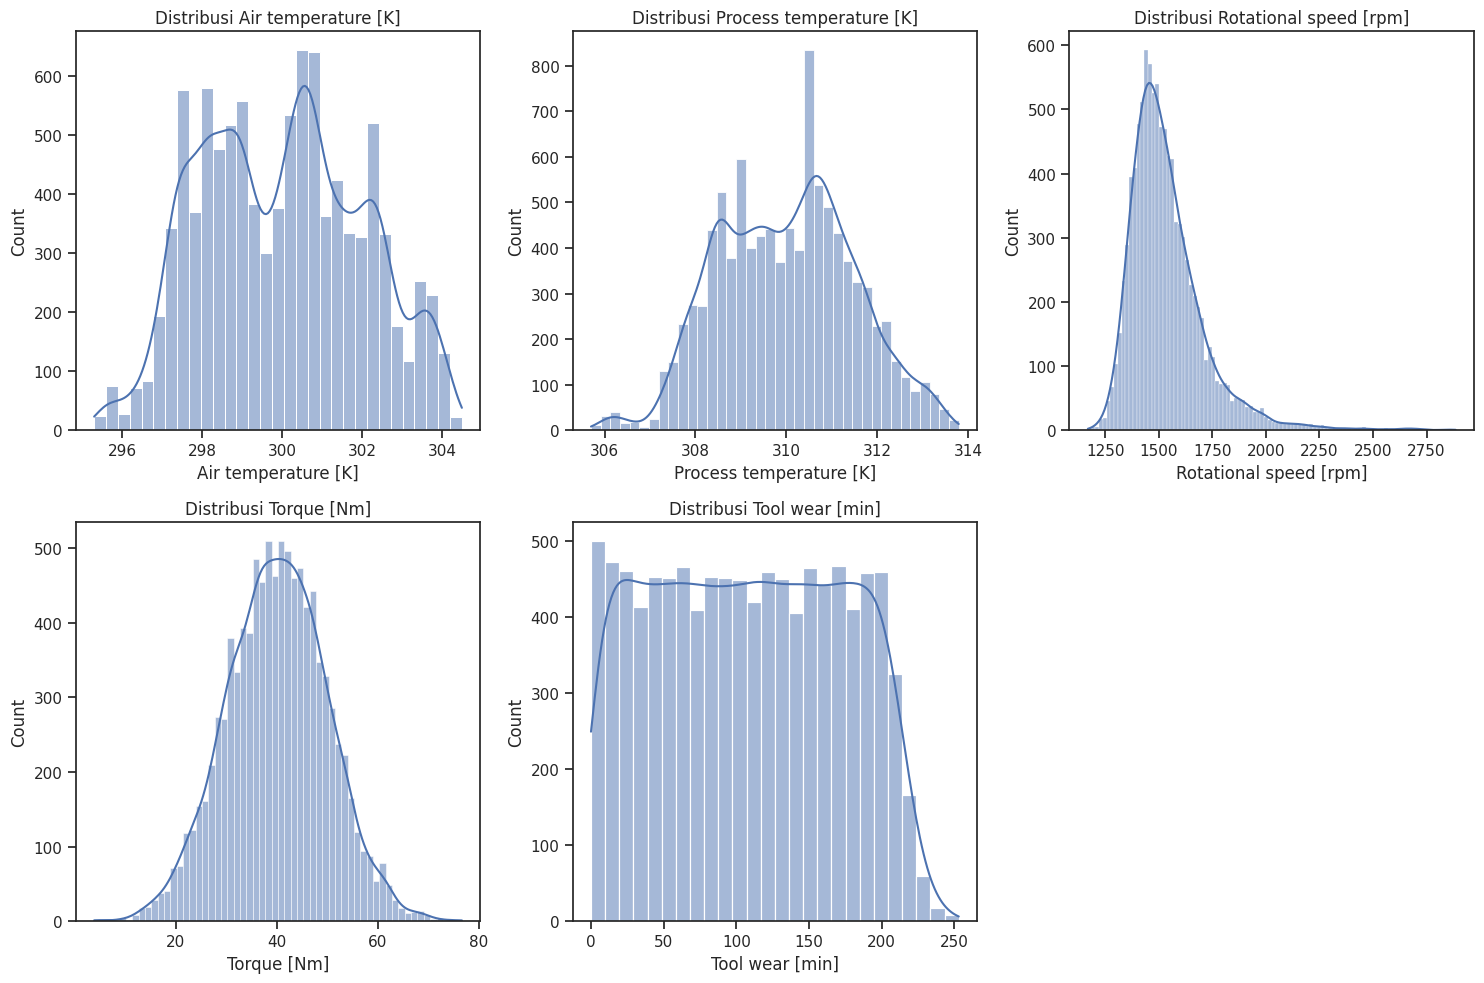

In [9]:
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(15,10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribusi {feature}')

plt.tight_layout()
plt.show()

In [10]:
#Statistik deskriptif
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


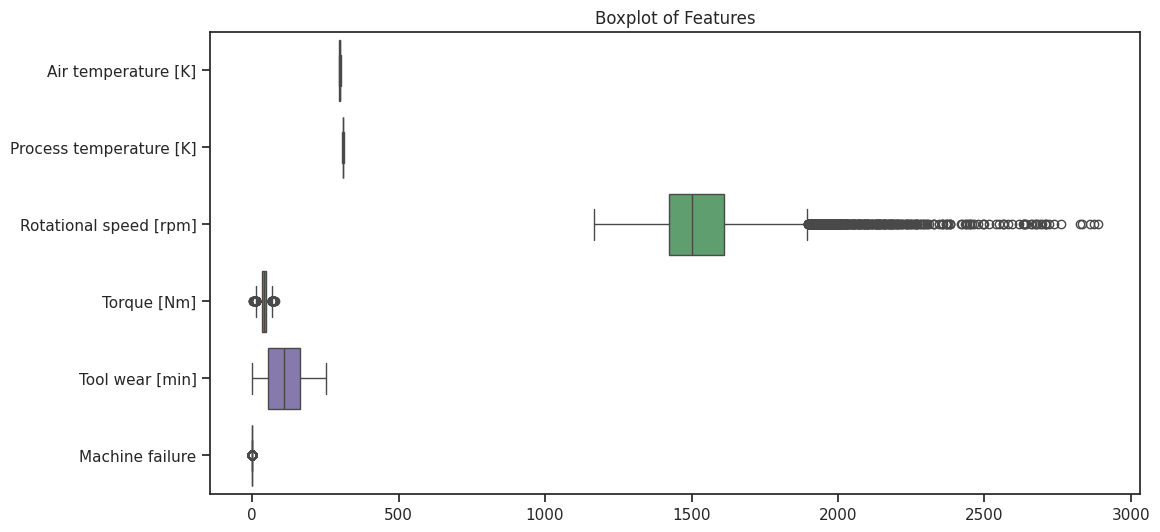

In [11]:
def detect_outliers(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, orient="h")
    plt.title('Boxplot of Features')
    plt.show()

detect_outliers(df)

#Preprocessing Data

In [12]:
#feature engineer
df['Temp_Diff'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['Wear_Rate'] = df['Torque [Nm]'] / (df['Rotational speed [rpm]'] + 1)


#features and target
x = df.drop(columns=['Machine failure']) #mengambil data selain dari yang didalam kurung
y = df['Machine failure'] #feature

#membedakan kolom tipe kategorikal dan numerikal untuk pipeline
categorical_cols = ['Type']
numerical_cols = x.columns.difference(categorical_cols)

#melakukan standarisasi dan encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols), #mengubah setiap fitur memiliki rata-rata 0 dan standar deviasi 1
        ('cat', OneHotEncoder(), categorical_cols) #mengubah dari kategorik menjadi numerik disesuaikan kolomnya agar bisa dilatih
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

x_transformed = pipeline.fit_transform(x)

encoded_cat_cols = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)
feature_names = numerical_cols.tolist() + encoded_cat_cols.tolist()

In [13]:
pd.DataFrame(x_transformed)

,0,1,2,3,4,5,6,7,8,9
0,-0.952389,-0.947360,0.068185,0.498849,-1.695984,0.282200,0.079307,0.0,0.0,1.0
1,-0.902393,-0.879959,-0.729472,0.498849,-1.648852,0.633308,0.677561,0.0,1.0,0.0
2,-0.952389,-1.014761,-0.227450,0.398954,-1.617430,0.944290,0.688333,0.0,1.0,0.0
3,-0.902393,-0.947360,-0.590021,0.398954,-1.586009,-0.048845,0.075685,0.0,1.0,0.0
4,-0.902393,-0.879959,-0.729472,0.498849,-1.554588,0.001313,0.171217,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,-0.602417,-1.082162,0.363820,-0.400212,-1.476034,-1.052012,-0.962228,0.0,0.0,1.0
9996,-0.552421,-1.082162,0.520005,-0.500108,-1.428902,-0.821283,-0.838419,1.0,0.0,0.0
9997,-0.502425,-0.947360,0.592519,-0.400212,-1.350349,-0.660777,-0.745756,0.0,0.0,1.0
9998,-0.502425,-0.879959,-0.729472,-0.300317,-1.303217,0.854005,0.854380,1.0,0.0,0.0


In [14]:
#Tulis jawaban di sini
X_train, X_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.3, random_state=0)

X_train

array([[ 0.34750743,  1.20946845, -0.53424086, ...,  0.        ,
         1.        ,  0.        ],
       [-1.25236565, -1.08216166,  1.41806562, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.0474519 ,  0.80506314, -0.43941454, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.64748363,  0.0636534 , -0.46730464, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85239738, -0.61035546, -0.65695726, ...,  0.        ,
         1.        ,  0.        ],
       [-0.15245291, -0.54295457, -1.07530865, ...,  0.        ,
         1.        ,  0.        ]])

#Oversampling menggunakan SMOTE

In [15]:

from imblearn.over_sampling import SMOTE,RandomOverSampler, SMOTENC, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN,SMOTETomek

oversample = SMOTE(k_neighbors=5)
#Melakukan oversampling data training saja
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

#HPO Menggunakan KNN

In [16]:
# defining parameter range
param_grid = [
    {'weights':['uniform','distance'], 'n_neighbors':[3,5,7,9,11,13,15], 'metric':['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean']}
 ]

#tolong perhatikan parameter scoring dan cv
classifierknn = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='recall', cv=5, refit = True, verbose = 3)

# fitting the model for grid search
classifierknn.fit(X_smote, y_smote)

# print best parameter after tuning
print('parameter terbaik:',classifierknn.best_params_)

# print how our model looks after hyper-parameter tuning
print(classifierknn.best_estimator_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.999 total time=   0.4s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.998 total time=   0.5s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.999 total time=   0.4s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.999 total time=   0.4s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=1.000 total time=   0.3s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.999 total time=   0.1s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.998 total time=   0.1s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.999 total time=   0.2s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.999 total time=   0.2s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=1.000 to

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 646, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 844, in skl

In [21]:
predictions = classifierknn.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2901
           1       0.30      0.75      0.43        99

    accuracy                           0.93      3000
   macro avg       0.64      0.84      0.69      3000
weighted avg       0.97      0.93      0.95      3000



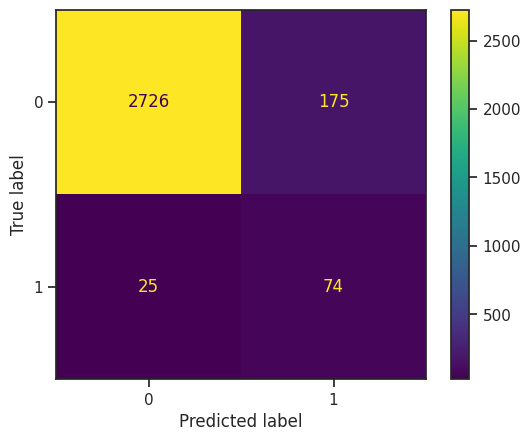

In [22]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = classifierknn.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifierknn.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=classifierknn.classes_)
disp.plot()

In [23]:
classifierknn.score(X_test, y_test)

0.7474747474747475

In [24]:
roc_auc_knn = roc_auc_score(y_test, predictions)
print("Gradient Boosting ROC AUC Score:", roc_auc_knn)

Gradient Boosting ROC AUC Score: 0.8435753606384423


#HPO menggunakan Neural Network

In [39]:
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.neural_network import MLPClassifier

# defining parameter range
param_grid = [
    {
        'hidden_layer_sizes': [(10,), (15, 10), (50,), (50, 25), (100,), (100, 50)],
        'max_iter': [200, 400, 600],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'sgd'],
        'learning_rate_init': [0.001, 0.01, 0.1],
        'alpha': [0.0001, 0.001, 0.01]
    }
]

# HalvingGridSearchCV untuk mempercepat proses pencarian hyperparameter
modelNeuralNetwork = HalvingGridSearchCV(MLPClassifier(), param_grid, scoring='recall', cv=5, refit=True, verbose=3)

# fitting the model for grid search
modelNeuralNetwork.fit(X_smote, y_smote)

# print best parameter after tuning
print('parameter terbaik:', modelNeuralNetwork.best_params_)

# print how our model looks after hyper-parameter tuning
print(modelNeuralNetwork.best_estimator_)


n_iterations: 6
n_required_iterations: 7
n_possible_iterations: 6
min_resources_: 20
max_resources_: 13520
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 972
n_resources: 20
Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.4s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist

[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(trai

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.4s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, sol

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solv

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.4s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(t

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist

[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(tr

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, sol

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solve

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, sco

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(tr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(trai

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(tra

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=20

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.5s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, sol

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solv

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.714, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.750, test=1.000) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist

[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, tes

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, te

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.714, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.625, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=ada

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, scor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, scor

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, te

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(tra

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, sol

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solve

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist

[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.857, test=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.7s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, scor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(trai

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(trai

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, tes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, te

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(tra

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(tra

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to 

[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, te

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, te

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist

[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.625, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.571, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(t

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, sol

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solv

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solv

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(t

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, sol

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.5s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=20

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.5s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.5s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.875, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solv

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.714, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.571, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, tes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, t

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, scor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, t

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, te

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, tes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, scor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(t

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.4s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, sol

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, sol

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.571, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.889, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.571, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.714, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, scor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(tr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.4s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.889, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.875, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.875, test=1.000) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.714, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.375, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.375, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.889, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.750, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.889, test=0.000) total time=   0.3s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.571, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, sol

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.714, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_ini

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_in

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.889, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.875, test=1.000) total time=   0.4s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_ini

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.3s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, ma

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.625, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.286, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.429, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, sol

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solve

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solv

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_ini

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.889, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_ini

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, ma

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.875, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.750, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.286, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.571, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_i

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=20

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=20

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_r

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_ra

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.889, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.500, test=0.000) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.3s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_ini

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.714, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.625, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.375, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.889, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.250, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.571, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solv

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.286, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.889, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.00

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.750, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.00

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, ma

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.250, test=0.500) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.889, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.625, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.625, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.143, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.571, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solv

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=ada

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=ada

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist

[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.00

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.00

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.375, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.750, test=0.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.625, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist

[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.286, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.4s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.571, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, sol

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_ini

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.6s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.5s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_i

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.889, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.571, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.429, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.125, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.889, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.286, test=0.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.889, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.500, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.429, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.714, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sg

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, scor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist

[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.429, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, m

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.889, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.875, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.125, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_ite

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=0.889, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=20

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Und

[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.429, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.286, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=ada

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.750, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.3s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.375, test=0.500) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=20

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.889, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.429, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.875, test=0.500) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.571, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.750, test=0.000) total time=   0.3s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.875, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, sol

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist

[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=ada

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.750, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.857, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.875, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.00

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.875, test=0.500) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.00

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.4s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.5s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.750, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.889, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.125, test=0.000) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.3s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.875, test=0.000) total time=   0.3s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_i

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.875, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.750, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.750, test=0.500) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.857, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_it

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.500) total time=   0.2s
----------
iter: 1
n_candidates: 324
n_resources: 60
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.778) total time

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=0.966, test=0.857) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, sol

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.875) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.667, test=0.556) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.842, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.556) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.7s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.3s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.889, test=0.556) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.846, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.889) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=0.947, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.944, test=0.667) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, sco

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.966, test=1.000) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.778, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.842, test=0.333) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=0.714) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.056, test=0.111) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.789, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.944, test=0.667) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.4s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.944, test=0.667) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.923, test=1.000) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.895, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.931, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.5s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.842, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.5s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.211, test=0.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.966, test=0.857) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.931, test=0.857) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.556) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.833) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(tr

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.5s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.842, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.5s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.3s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=0.966, test=0.857) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.778) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=40

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.556) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.6s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.3s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.556, test=0.333) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.737, test=0.333) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.556) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.962, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.966, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.778) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, scor

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(trai

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.947, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.857) total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.966, test=0.875) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.778, test=0.667) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.846, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.579, test=0.333) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.778) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.947, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.889, test=0.667) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.778) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.931, test=1.000) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.923, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.947, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.556) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.667) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.923, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.947, test=0.667) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.778, test=0.778) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.737, test=0.667) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=0.714) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.00

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(tra

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.6s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.857) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.923, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.931, test=1.000) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.556) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.962, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.862, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.611, test=0.333) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.862, test=0.714) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.778) total time=   0.6s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.6s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.556) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.962, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.789, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.778) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.962, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.556) total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.833) total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=adam;

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.833, test=0.667) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=0.889, test=0.444) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_ite

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.778) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.857) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.833, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.5s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.556) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(tr

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.889) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.962, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.966, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.778) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.966, test=1.000) total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(trai

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.667) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.923, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.947, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.667, test=0.556) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.4s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.5s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.944, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.923, test=1.000) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.842, test=0.667) total time=   0.3s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.897, test=1.000) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.778, test=0.778) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.808, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.842, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.931, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.923, test=1.000) total time=   0.5s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.842, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.897, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.833, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.556) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.966, test=0.857) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.808, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.966, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.833, test=0.778) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.923, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.842, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.931, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_ini

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.944, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.923, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.895, test=0.667) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.931, test=1.000) total time=   0.5s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.722, test=0.667) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.833, test=0.778) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=sgd;,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.778) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.947, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.778) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=0.875) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.667, test=0.556) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.789, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.778) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.923, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.947, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.966, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.828, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.722, test=0.444) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.778) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.808, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.684, test=0.333) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.862, test=0.857) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.833, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.778, test=0.667) total time=   0.3s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.778) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.778, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.846, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.789, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.828, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.667, test=0.667) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.808, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.897, test=0.714) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.833, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.862, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.833, test=0.556) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.667) total time=   0.4s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.556) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.857) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.889, test=0.778) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.722, test=0.556) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.962, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.947, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.931, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.778, test=0.667) total time=   0.3s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.789, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.889, test=0.778) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.778) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(tra

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, sco

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.889, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.885, test=1.000) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.842, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.931, test=1.000) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.778, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.789, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.778, test=0.556) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.263, test=0.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.889, test=0.778) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.833, test=0.778) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.962, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.895, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.966, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.778) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.962, test=1.000) total time=   0.4s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.842, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.931, test=1.000) total time=   0.4s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.862, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.778, test=0.556) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=0.714) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.966, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.556, test=0.556) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.846, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.789, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.931, test=0.857) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.833, test=0.556) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.808, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.778) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.947, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.875) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.714) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, so

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.944, test=0.778) total time=   0.6s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.556) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.4s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.889, test=0.778) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.4s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.833, test=0.778) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.944, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.962, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.895, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.966, test=0.714) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.966, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.778, test=0.667) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.923, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.842, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.931, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.778, test=0.778) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.667, test=0.444) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.667) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.778, test=0.667) total time=   0.5s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.778) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.966, test=0.875) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.885, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.632, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.857) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.667, test=0.556) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.778, test=0.556) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.808, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.931, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.962, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.895, test=0.333) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.833, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.944, test=0.778) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.667) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.789, test=0.667) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.4s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.722, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.611, test=0.444) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.778, test=0.667) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.889, test=0.778) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.778) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.947, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.931, test=0.750) total time=   0.3s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.056, test=0.111) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.808, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.842, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.931, test=0.857) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=0.875) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.556) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.789, test=0.667) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.966, test=0.875) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.000, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.885, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.737, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.931, test=0.857) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.889, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.808, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.842, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.931, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.722, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.4s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.889, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.778) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.833, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.053, test=0.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.889, test=0.778) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.444, test=0.444) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.885, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.684, test=0.333) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.931, test=0.857) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solve

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.368, test=0.000) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.278, test=0.333) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.684, test=0.333) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.778, test=0.556) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.789, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.833, test=0.778) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.625) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.962, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.333) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.667, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.778, test=0.667) total time=   0.4s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.862, test=0.625) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.778) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.931, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.611, test=0.556) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.846, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.789, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.931, test=0.857) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.889, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.885, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.842, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.931, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.846, test=1.000) total time=   0.4s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.842, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.931, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.667) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.833, test=0.556) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(tr

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.833, test=0.778) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=0.857) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.667) total time=   0.6s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.722, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.421, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.966, test=0.857) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.556) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.778) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.722, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.778, test=0.667) total time=   0.3s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.4s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.778) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, sol

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.722, test=0.778) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.714) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.944, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.875) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.833, test=0.667) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.846, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.895, test=1.000) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.897, test=0.714) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.931, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.722, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.846, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.842, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.931, test=0.857) total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.789, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.556) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.897, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.944, test=0.778) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.923, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.947, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.966, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.889) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=0.889, test=0.444) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.889, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.556) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=adam;, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.944, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.889, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.846, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.842, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.931, test=0.857) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.889, test=0.778) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.808, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.966, test=0.750) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.885, test=1.000) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.842, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.966, test=1.000) total time=   0.5s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.889, test=0.778) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.931, test=1.000) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.5s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.6s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.4s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.222, test=0.333) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.737, test=0.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.889) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.862, test=0.750) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.889, test=0.444) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=0.857) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.3s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.4s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.4s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.966, test=0.857) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=0.750) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.778, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.885, test=1.000) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.789, test=0.333) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.778) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.962, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.947, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.931, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.889, test=0.667) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.6s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.750) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=0.857) total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.895, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.750) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=1.000, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.962, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.947, test=0.667) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.966, test=1.000) total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.897, test=0.750) total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.889, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.923, test=1.000) total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.842, test=0.667) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.966, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.897, test=0.750) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.556, test=0.556) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.923, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.842, test=0.667) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.931, test=0.714) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.000, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.846, test=1.000) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.684, test=0.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.966, test=0.857) total time=   0.2s
----------
iter: 2
n_candidates: 108
n_resources: 180
Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.949, test=0.900) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.905, test=0.889) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.943, test=0.789) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.915, test=1.000) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.797, test=0.833) total time=   0.7s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.889) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.895) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.800) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=a

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.949, test=0.900) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.892, test=0.778) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.943, test=0.789) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.890, test=0.933) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.797, test=0.833) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.974, test=0.900) total time=   1.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.824, test=0.833) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.929, test=0.737) total time=   1.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.902, test=0.933) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.884, test=0.889) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.936, test=0.900) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.932, test=0.833) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.943, test=0.737) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.939, test=0.933) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.870, test=0.889) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.936, test=0.800) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.905, test=0.833) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.914, test=0.737) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.902, test=0.933) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.826, test=0.889) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.962, test=0.900) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.932, test=0.889) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.943, test=0.789) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.927, test=0.867) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.826, test=0.833) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.974, test=0.900) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.986, test=0.889) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.842) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.733) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.928, test=0.944) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.962, test=0.900) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.973, test=0.889) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.957, test=0.842) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.976, test=0.733) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.942, test=0.944) total time=   0.5s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.962, test=0.900) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.973, test=0.889) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.957, test=0.789) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.951, test=0.867) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.870, test=0.833) total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.949, test=0.900) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.932, test=0.833) total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.943, test=0.947) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.902, test=0.867) total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.870, test=0.833) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.987, test=1.000) total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.946, test=0.944) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.914, test=1.000) total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.939, test=0.867) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.913, test=0.889) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.821, test=0.700) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.784, test=0.778) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.771, test=0.684) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.854, test=0.733) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.812, test=0.833) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.987, test=0.900) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.932, test=0.833) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.943, test=0.895) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.915, test=0.933) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.884, test=0.889) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=0.800) total time=   0.4s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.824, test=0.833) total time=   0.4s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.929, test=0.789) total time=   0.4s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.902, test=0.933) total time=   0.4s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.826, test=0.889) total time=   0.4s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.889) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.895) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.867) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.944) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=0.800) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.824, test=0.833) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.929, test=0.737) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.890, test=0.933) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.812, test=0.889) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.7s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.889) total time=   0.9s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.895) total time=   0.7s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.733) total time=   0.7s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, sol

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.987, test=0.900) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.986, test=0.889) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.971, test=0.842) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.988, test=0.733) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.957, test=0.944) total time=   0.6s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.900) total time=   0.8s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.889) total time=   0.9s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.895) total time=   0.7s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.800) total time=   0.6s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.900) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.889) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.895) total time=   0.4s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.733) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.900) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.833) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.947) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.867) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.889) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.895) total time=   1.4s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.800) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.6s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.889) total time=   0.4s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.947) total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.933) total time=   0.3s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.944) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.842) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.667) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.962, test=0.900) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.932, test=0.889) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.943, test=0.737) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.927, test=0.933) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.841, test=0.889) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.974, test=0.900) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.973, test=0.833) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.971, test=0.842) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.988, test=0.733) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.942, test=0.944) total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.949, test=0.800) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.932, test=0.833) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.929, test=0.737) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.927, test=0.933) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.884, test=0.889) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.936, test=0.800) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.905, test=0.833) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.929, test=0.789) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.890, test=0.933) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.812, test=0.889) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.974, test=0.900) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.959, test=0.889) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.943, test=0.737) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.976, test=0.800) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.899, test=0.944) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.833) total time=   0.4s
[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.947) total time=   0.4s
[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.867) total time=   0.4s
[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.944) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.974, test=0.900) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.946, test=0.889) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.914, test=0.737) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.927, test=0.933) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.884, test=0.833) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=0.800) total time=   0.8s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.824, test=0.833) total time=   0.8s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.929, test=0.789) total time=   0.7s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.902, test=0.933) total time=   0.7s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.826, test=0.889) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.885, test=0.800) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.905, test=0.833) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.914, test=0.737) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.890, test=0.933) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.797, test=0.889) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.897, test=0.800) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.824, test=0.833) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.914, test=0.789) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.878, test=0.867) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.812, test=0.833) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.987, test=0.900) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.889) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.895) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.988, test=0.733) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.986, test=1.000) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.900) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.889) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.895) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.800) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.9s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.833) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.842) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.733) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.949, test=0.800) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.919, test=0.833) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.943, test=0.737) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.915, test=0.933) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.826, test=0.889) total time=   0.8s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.910, test=0.800) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.892, test=0.889) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.929, test=0.789) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.902, test=0.867) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.768, test=0.833) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.900) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.889) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.895) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.800) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.8s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.923, test=0.800) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.838, test=0.889) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.943, test=0.737) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.902, test=0.933) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.812, test=0.889) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.910, test=0.800) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.932, test=0.833) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.929, test=0.737) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.902, test=0.933) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.797, test=0.889) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.910, test=0.800) total time=   0.3s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.878, test=0.889) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.929, test=0.737) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.890, test=0.933) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.754, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.936, test=0.800) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.905, test=0.833) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.929, test=0.737) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.902, test=0.933) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.855, test=0.833) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.900) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.889) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.895) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=adam;, s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.949, test=0.900) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.905, test=0.833) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.929, test=0.842) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.902, test=0.733) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.855, test=0.833) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.962, test=0.900) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.959, test=0.833) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.957, test=0.737) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.927, test=0.933) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.870, test=0.889) total time=   1.2s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=0.800) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.824, test=0.833) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.914, test=0.789) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.902, test=0.933) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.826, test=0.889) total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.900) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.889) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.789) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=adam;,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.833) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.842) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.988, test=0.867) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.962, test=0.900) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.973, test=0.889) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.957, test=0.789) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.976, test=0.933) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.899, test=0.889) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.900) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.889) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.842) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.800) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.986, test=1.000) total time=   0.5s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.936, test=0.800) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.892, test=0.833) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.929, test=0.737) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.915, test=0.933) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.855, test=0.889) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=0.800) total time=   0.5s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.824, test=0.833) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.914, test=0.789) total time=   0.5s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.890, test=0.933) total time=   0.4s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.826, test=0.889) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.962, test=0.900) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.919, test=0.833) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.943, test=0.737) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.927, test=0.933) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.870, test=0.889) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.900) total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.889) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=0.842) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.988, test=0.800) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.971, test=1.000) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.962, test=0.900) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.932, test=0.889) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.943, test=0.737) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.927, test=0.933) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.884, test=0.889) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.900) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.889) total time=   0.5s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.895) total time=   0.5s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.800) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.897, test=0.800) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.905, test=0.833) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.943, test=0.737) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.890, test=0.933) total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.812, test=0.889) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.923, test=0.800) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.919, test=0.833) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.914, test=0.737) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.915, test=0.933) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.797, test=0.889) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.962, test=0.900) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.986, test=0.833) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.986, test=0.789) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.976, test=0.867) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.971, test=0.944) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.962, test=0.900) total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.973, test=0.889) total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.971, test=0.789) total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.988, test=0.733) total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.928, test=0.944) total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.962, test=0.900) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.973, test=0.833) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.971, test=0.842) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.963, test=0.733) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.942, test=0.944) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.897, test=0.800) total time=   1.8s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.905, test=0.833) total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.929, test=0.789) total time=   1.7s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.902, test=0.933) total time=   1.5s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.783, test=0.833) total time=   1.5s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.900) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.889) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=600, sol

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.962, test=0.900) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.919, test=0.889) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.971, test=0.789) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.927, test=0.933) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.928, test=0.944) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.910, test=0.800) total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.919, test=0.833) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.929, test=0.737) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.915, test=0.933) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.870, test=0.889) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.962, test=0.900) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.946, test=0.889) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.943, test=0.789) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.927, test=0.933) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.870, test=0.889) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.962, test=0.800) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.833) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.986, test=0.842) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=1.000, test=0.733) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.913, test=1.000) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.897, test=0.800) total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.892, test=0.833) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.943, test=0.789) total time=   3.6s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.890, test=0.933) total time=   2.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.826, test=0.833) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.910, test=0.800) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.919, test=0.778) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.914, test=0.842) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.890, test=0.867) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.826, test=0.833) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=0.800) total time=   0.3s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.824, test=0.833) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.914, test=0.789) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.902, test=0.933) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.826, test=0.889) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.962, test=0.900) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.946, test=0.889) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.929, test=0.737) total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.927, test=0.933) total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.855, test=0.889) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.987, test=0.900) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=1.000, test=0.889) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.986, test=0.842) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.988, test=0.733) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.942, test=0.944) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.987, test=0.900) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.973, test=0.833) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.971, test=0.842) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.939, test=0.800) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.928, test=0.944) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.897, test=0.800) total time=   0.5s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.824, test=0.833) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.914, test=0.789) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.878, test=0.933) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.797, test=0.889) total time=   0.5s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.900) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.833) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.971, test=0.789) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.800) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=0.800) total time=   0.3s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.824, test=0.833) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.914, test=0.789) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.902, test=0.933) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.826, test=0.889) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.962, test=0.900) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.959, test=0.833) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.957, test=0.789) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.951, test=0.933) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.913, test=0.889) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=0.800) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.824, test=0.833) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.914, test=0.737) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.902, test=0.933) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.936, test=0.900) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.919, test=0.889) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.943, test=0.789) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.915, test=0.933) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.870, test=0.889) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.923, test=0.800) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.919, test=0.833) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.914, test=0.789) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.902, test=1.000) total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=600, solver=sgd;, score=(train=0.797, test=0.778) total time=   0.6s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.949, test=0.900) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.946, test=0.833) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.971, test=0.737) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.976, test=0.867) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.855, test=0.833) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.936, test=0.800) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.905, test=0.889) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.929, test=0.789) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.927, test=0.933) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.855, test=0.889) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.900) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.889) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.895) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.800) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.900) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.889) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.842) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.800) total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   0.6s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=0.800) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.824, test=0.833) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.914, test=0.789) total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.902, test=0.933) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=200, solver=sgd

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.905, test=0.889) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.943, test=0.789) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.939, test=0.933) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.841, test=0.889) total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.900) total time=   0.8s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.889) total time=   0.8s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.842) total time=   0.6s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.800) total time=   0.6s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(tr

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.824, test=0.833) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.957, test=0.789) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.927, test=0.933) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.913, test=0.833) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.885, test=0.900) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.905, test=0.778) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.929, test=0.789) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.890, test=0.933) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.783, test=0.833) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.833) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.947) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.867) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.897, test=0.800) total time=   0.3s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.824, test=0.833) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.914, test=0.789) total time=   0.3s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.902, test=0.933) total time=   0.3s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.812, test=0.889) total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=adam;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.900) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.889) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.842) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.800) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=1.000, test=0.889) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.962, test=0.900) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.919, test=0.833) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.914, test=0.737) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.939, test=0.933) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.884, test=0.889) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.949, test=0.800) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.959, test=0.889) total time=   0.5s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.929, test=0.737) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.927, test=0.933) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=600, solver=adam;, score=(train=0.913, test=0.944) total time=   0.5s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.800) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.833) total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.842) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=1.000, test=0.800) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=600, solver=adam;, score=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.824, test=0.889) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.929, test=0.789) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.902, test=0.933) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.812, test=0.889) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.833, test=0.600) total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.784, test=0.778) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.814, test=0.737) total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.829, test=0.733) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(15, 10), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.797, test=0.722) total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.900) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.889) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.842) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=600, solver=adam;, score=(train=1.000, test=0.867) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.974, test=1.000) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.973, test=0.889) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.971, test=0.789) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.963, test=0.933) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.928, test=0.944) total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.974, test=0.900) total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.973, test=0.889) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.929, test=0.737) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.939, test=0.933) total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.928, test=0.944) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.949, test=0.800) total time=   1.3s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.824, test=0.833) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.929, test=0.737) total time=   1.8s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.902, test=0.933) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=400, solver=adam;, score=(train=0.870, test=0.889) total time=   0.8s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.897, test=0.900) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.919, test=0.889) total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.957, test=0.947) total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.939, test=0.867) total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.841, test=0.889) total time=   0.1s
----------
iter: 3
n_candidates: 36
n_resources: 540
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.959, test=0.957) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.971, test=0.962) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.967, test=0.932) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.945, test=0.935) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.964, test=0.923) total time=   2.4s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.995, test=1.000) total time=   0.4s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.906) total time=   0.5s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.909) total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.995, test=0.984) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.923) total time=   0.6s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.982, test=1.000) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.971, test=0.943) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.962, test=0.977) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.977, test=0.952) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=400, solver=adam;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.896, test=0.894) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.942, test=0.943) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.914, test=0.955) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.908, test=0.887) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.871, test=0.885) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.946, test=0.979) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.954, test=0.943) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.971, test=0.977) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.959, test=0.919) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.973, test=0.942) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.968, test=0.979) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.958, test=0.981) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.962, test=0.977) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.963, test=0.935) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=400, solver=sgd;, score=(train=0.951, test=0.885) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.968, test=0.979) total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.967, test=0.962) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.971, test=0.909) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.959, test=0.935) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=sgd;, score=(train=0.955, test=0.942) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.973, test=1.000) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.983, test=0.962) total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.981, test=1.000) total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.982, test=0.952) total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.973, test=0.942) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.950, test=0.894) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.963, test=0.943) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.905, test=0.955) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.917, test=0.952) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.911, test=0.846) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.878, test=0.872) total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.912, test=0.906) total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.886, test=0.886) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.908, test=0.887) total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.897, test=0.865) total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.986, test=1.000) total time=   2.3s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.979, test=0.943) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.986, test=0.968) total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.982, test=0.942) total time=   2.8s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.995, test=1.000) total time=   0.7s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.996, test=0.962) total time=   0.7s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=1.000) total time=   0.6s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.968) total time=   0.5s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solv

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.986, test=1.000) total time=   4.9s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.979, test=0.943) total time=   5.6s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.986, test=1.000) total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.995, test=0.935) total time=   7.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.978, test=0.923) total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.995, test=1.000) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.996, test=0.925) total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.991, test=0.968) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.991, test=0.942) total time=   1.2s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.995, test=1.000) total time=   0.9s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.925) total time=   1.6s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.995, test=0.952) total time=   2.6s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.962) total time=   1.7s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.995, test=1.000) total time=   1.6s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.925) total time=   2.4s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   1.8s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.878, test=0.872) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.942, test=0.925) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.886, test=0.886) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.899, test=0.871) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.888, test=0.865) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.964, test=0.936) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.958, test=0.943) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.986, test=0.955) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.959, test=0.935) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=adam;, score=(train=0.946, test=0.904) total time=   0.9s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.991, test=0.979) total time=   2.2s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=0.943) total time=   2.3s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=1.000, test=1.000) total time=   1.2s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.991, test=0.952) total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.996, test=0.923) total time=   1.3s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.995, test=1.000) total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.992, test=0.962) total time=   2.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.991, test=0.952) total time=   3.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.987, test=0.962) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.982, test=1.000) total time=   1.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.971, test=0.962) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.967, test=0.932) total time=   1.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.885, test=0.871) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=200, solver=adam;, score=(train=0.969, test=0.942) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.962) total time=   1.8s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.991, test=0.935) total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.942) total time=   1.8s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.979) total time=   2.4s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.962) total time=   2.4s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   1.4s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.952) total time=   4.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.874, test=0.894) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.900, test=0.906) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.905, test=0.909) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.889, test=0.887) total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.001, max_iter=200, solver=sgd;, score=(train=0.875, test=0.904) total time=   0.5s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.986, test=1.000) total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.967, test=0.925) total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.932) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.986, test=0.952) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.968, test=0.979) total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.967, test=0.962) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.990, test=0.955) total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.982, test=0.952) total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.978, test=0.923) total time=   0.7s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.995, test=1.000) total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.981) total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.995, test=0.952) total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.962) total time=   1.8s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.941, test=0.957) total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.988, test=1.000) total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.933, test=0.795) total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=adam;, score=(train=0.986, test=0.968) total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15, 10), learning_rate_init=0.1, max_iter=600, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.986, test=0.979) total time=   0.3s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.996, test=1.000) total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.995, test=0.977) total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.995, test=0.919) total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.996, test=0.904) total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.905, test=0.872) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.904, test=0.925) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.900, test=0.864) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.899, test=0.903) total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=400, solver=sgd;, score=(train=0.920, test=0.904) total time=   0.5s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.986, test=1.000) total time=   0.7s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.992, test=0.925) total time=   0.9s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.990, test=0.977) total time=   0.6s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd;, score=(train=0.935, test=0.968) total time=   0.6s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=400, solver=sgd

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.991, test=0.988) total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.997, test=0.994) total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.997, test=0.987) total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.998, test=0.969) total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.991, test=0.976) total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.997, test=0.982) total time=   6.0s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.997, test=0.994) total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.998, test=0.987) total time=   6.9s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.998, test=0.975) total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.998, test=0.976) total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.998, test=0.988) total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   6.6s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.997, test=0.994) total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.998, test=0.969) total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.970) total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.992, test=0.982) total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.998, test=1.000) total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.998, test=0.994) total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.997, test=0.969) total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.992, test=0.982) total time=   6.7s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.998, test=0.975) total time=   5.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=1.000) total time=   7.7s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=0.998, test=0.987) total time=   4.6s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, score=(train=1.000, test=0.981) total time=   7.7s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=600, solver=sgd;, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.983, test=0.982) total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.988, test=0.994) total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.986, test=0.987) total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.992, test=0.969) total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.983, test=0.970) total time=   6.4s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.997, test=0.982) total time=   2.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=1.000, test=0.994) total time=   1.5s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.997, test=0.994) total time=   1.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.997, test=0.981) total time=   1.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=ad

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.991, test=0.982) total time=   6.6s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.997, test=1.000) total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.998, test=0.994) total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.997, test=0.981) total time=   6.7s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 25), learning_rate_init=0.01, max_iter=600, solver=sgd;, score=(train=0.989, test=0.988) total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.998, test=0.988) total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=1.000) total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.995, test=0.987) total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.998, test=0.975) total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.997, test=0.982) total time=   5.4s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.998, test=0.975) total time=   2.4s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=0.991, test=0.988) total time=   1.4s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.994) total time=   0.9s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solver=adam;, score=(train=1.000, test=0.988) total time=   1.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=400, solv

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.999, test=1.000) total time=  15.5s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=0.999, test=0.998) total time=  12.5s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=200, solver=sgd;, score=(train=1.000, test=0.981) total time=  14.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.994, test=0.988) total time=   3.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver=adam;, score=(train=0.996, test=0.985) total time=   2.3s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=200, solver

In [40]:

from sklearn.metrics import classification_report
predictions_NN = modelNeuralNetwork.predict(X_test)

# print classification report
print(classification_report(y_test, predictions_NN))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2901
           1       0.58      0.62      0.60        99

    accuracy                           0.97      3000
   macro avg       0.78      0.80      0.79      3000
weighted avg       0.97      0.97      0.97      3000



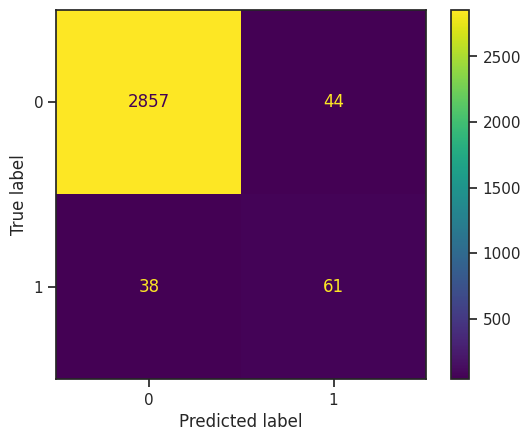

In [41]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions_NN, labels=modelNeuralNetwork.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=modelNeuralNetwork.classes_)
disp.plot()

In [44]:
modelNeuralNetwork.score(X_test, y_test)

0.6161616161616161

In [46]:
roc_auc_NN = roc_auc_score(y_test, predictions_NN)
print("Neural Network ROC AUC Score:", roc_auc_NN)

Neural Network ROC AUC Score: 0.800497216215934


#Predict Model menggunakan Logistic Regression

In [25]:
# Import Model untuk prediksi Customer bayar pinjaman atau tidak

from sklearn.linear_model import LogisticRegression # Package for model logistic Regression
from sklearn import metrics # Package for metrics evaluation for Logistic Regression

In [26]:
# Buat fungsi model Logistic Regression untuk memprediksi Customer bayar pinjaman atau tidak

model_logistic_regression = LogisticRegression()

In [27]:
# Proses model Machine Learning untuk memprediksi Customer bayar pinjaman atau tidak

model_logistic_regression.fit( X_smote, y_smote )

LogisticRegression()

In [28]:
predictlr = model_logistic_regression.predict(X_test)
predictlr

array([1, 0, 0, ..., 0, 0, 0])

In [29]:
print(classification_report(y_test, predictlr))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      2901
           1       0.15      0.83      0.26        99

    accuracy                           0.84      3000
   macro avg       0.57      0.84      0.59      3000
weighted avg       0.97      0.84      0.89      3000



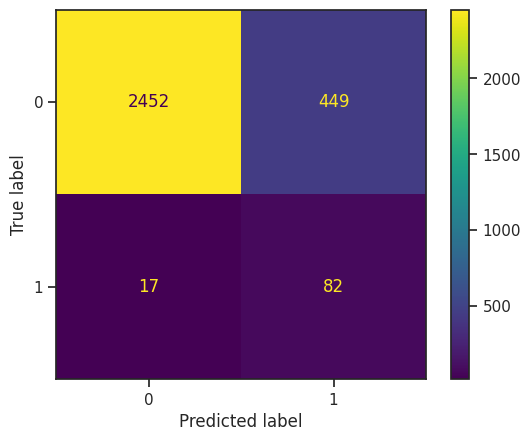

In [30]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictlr, labels=model_logistic_regression.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model_logistic_regression.classes_)
disp.plot()

In [31]:
model_logistic_regression.score(X_test, y_test)

0.8446666666666667

In [32]:
roc_auc_lr = roc_auc_score(y_test, predictlr)
print("Gradient Boosting ROC AUC Score:", roc_auc_lr)

Gradient Boosting ROC AUC Score: 0.8367543062475844


#Predict Menggunakan Random Forest

In [48]:
model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:

y_predrf = model_rf.predict(X_test) #preksi menggunakan x_test

accuracy = accuracy_score(y_test, y_predrf) #akurasi score dari perbandingan y_test,y_pred
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_predrf))

cm = confusion_matrix(y_test, y_predrf)
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2901
           1       0.85      0.69      0.76        99

    accuracy                           0.99      3000
   macro avg       0.92      0.84      0.88      3000
weighted avg       0.98      0.99      0.98      3000

Confusion Matrix:
[[2889   12]
 [  31   68]]


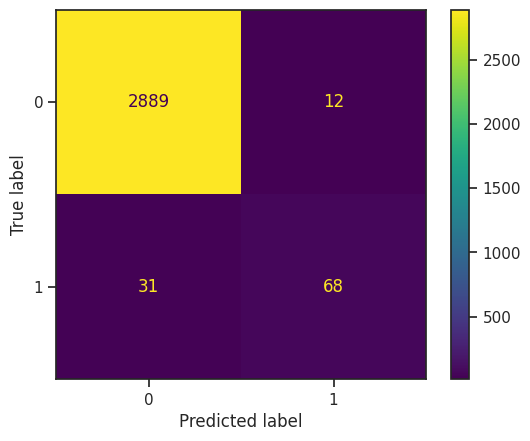

In [50]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predrf, labels=model_rf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model_rf.classes_)
disp.plot()

In [51]:
roc_auc_rf = roc_auc_score(y_test, y_predrf)
print("Random Forest ROC AUC Score:", roc_auc_rf)

Random Forest ROC AUC Score: 0.8413660911075596


#Predict dengan Gradient Boosting

In [37]:
gb = GradientBoostingClassifier(random_state=42, n_estimators=350, learning_rate=0.1, max_depth=7)
gb.fit(X_smote, y_smote)

y_pred_gb = gb.predict(X_test)
y_pred_proba_gb = gb.predict_proba(X_test)[:, 1]

acc_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)

In [38]:
print("Gradient Boosting Accuracy: ", acc_gb)
print("Gradient Boosting Classification Report:\n", classification_rep_gb)
print("Gradient Boosting Confusion Matrix:\n", conf_matrix_gb)
print("Gradient Boosting ROC AUC Score:", roc_auc_gb)

Gradient Boosting Accuracy:  0.9786666666666667
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2901
           1       0.65      0.77      0.70        99

    accuracy                           0.98      3000
   macro avg       0.82      0.88      0.85      3000
weighted avg       0.98      0.98      0.98      3000

Gradient Boosting Confusion Matrix:
 [[2860   41]
 [  23   76]]
Gradient Boosting ROC AUC Score: 0.9616781395478395
